# Projek Akhir Matakuliah Kecerdasan Buatan
## Klasifikasi Kunci Dasar Gitar / Guitar Chords Classification
### Kelompok 3 B1 2020
#### - Muhammad Wendra Suryananda -- 2009106056 (Modelling)
#### - Raymond Jonathan Damanik -- 2009106057 (Pre-processing)
#### - Muhammad Nizar -- 2009106059 (Data Analyst / Data Visualisasi)

In [1]:
# pip install split-folders tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


#### Import Libary awal yang diperlukan

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import splitfolders
import os

#### Input Folder untuk dibagi menjadi train dan val

In [2]:
# base_dir = '/Semester 5/Praktikum/Kecerdasan Buatan/PA/Data foto' # punya wendra
base_dir = 'C:\FILE SEB INSTALL ULANG 7 6 2021\KULIAH\Semester 5\Kecerdasan Buatan\Praktikum KB\Projek Akhir\dataset' # punya nizar

# Preprocessing

#### Membagi folder Train, Validation, Testing dengan perbandingan 7:1:2

In [3]:
splitfolders.ratio(
    base_dir,
    output='ready_dataset',
    ratio=(.7, 0.1,0.2)
)

Copying files: 1414 files [00:15, 93.21 files/s] 


#### Menambahkan ke masing masing folder untuk Training, Validation, dan Testing

In [4]:
train_dir = 'ready_dataset/train'
val_dir = 'ready_dataset/val' 
test_dir = 'ready_dataset/test'

os.listdir(test_dir)

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [5]:
from keras.preprocessing.image import ImageDataGenerator

#### Mencoba menggunakan grayscale, tidak jadi karena posisi akurasi menurun lumayan tinggi

In [12]:
#def to_grayscale_then_rgb(image):
    #original = tf.constant([[[32, 150, 3.0]]])
    #image = tf.image.rgb_to_grayscale(image)
    #return image 

#### Proses Augmentasi Gambar
##### Pada Data Train
- ReScale
- Rotation
- Brightness
- Scaling
- Zoom in / Zoom out
- Horizontal dan Vertical Flip
##### Pada Data Valdiation dan Testing
- ReScale

In [6]:
# augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20, # memutar gambar
                    brightness_range=(0.5,1.0), # value < 1 lebih gelap
                    shear_range=0.2, # untuk mengatur skala image
                    zoom_range=(0.8,1.0), # value < 1 akan zoom in
                    fill_mode='nearest', # untuk mengisi gambar atau wadah yang tidak memiliki nilai
                    #preprocessing_function=to_grayscale_then_rgb,
                    horizontal_flip=True,
                    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


#### Mengambil direktori untuk di proses augmentasi masing-masing
##### Pada Data Train, Validation, Testing
- nama direktori masing-masing
- target gambar yang diaugmentasi sebesar 150 x 150
- batch size yaitu gambar yang dimasukan kedalam step untuk dimana 1 step yaitu ada 32 gambar yang dimasukkan

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=32,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 987 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Found 287 images belonging to 7 classes.


#### Membuat Model mulai dari elemen yang kedua

In [8]:
image, label = train_generator.next()

# Visualisasi

#### Menentukan Class untuk Visualisasi Jumlah Data

In [9]:
class_name = ['A','B','C','D','E','F','G']

### Jumlah Keseluruhan Data

#### Pallet warna Visualisasi

In [10]:
palette1 = list(reversed(sns.color_palette("mako", 7).as_hex()))
palette2 = list(reversed(sns.color_palette("viridis", 7).as_hex()))
palette3 = list(reversed(sns.color_palette("cubehelix", 7).as_hex()))
palette4 = list(reversed(sns.color_palette("icefire", 7).as_hex()))

#### Visualisasi Jumlah Data Semuanya, Training, Validation, Testing
##### Jumlah Data Keseluruhan

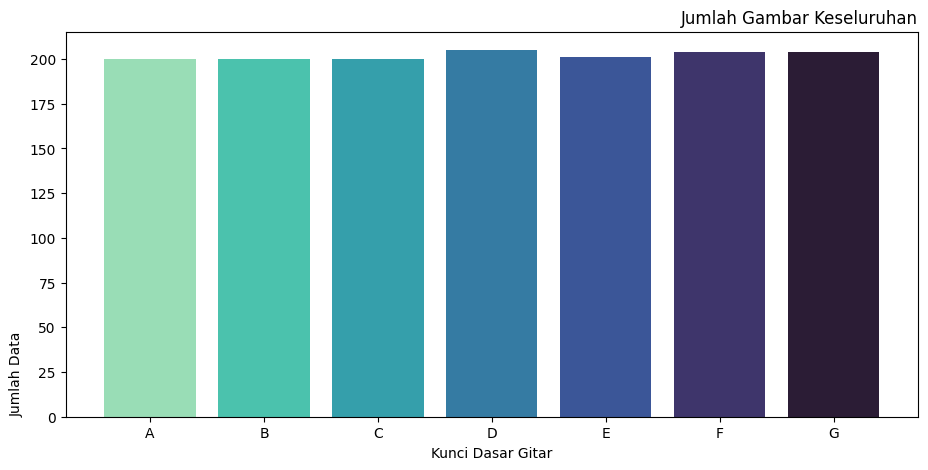

In [11]:
list_jumlah_file_all = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas in os.listdir(base_dir):
    list_file_kelas = os.listdir(os.path.join(base_dir, kelas)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file = len(list_file_kelas)
    list_jumlah_file_all.append(banyaknya_file) # masukkan jumlahnya ke dalam list
    
x = class_name # variabel yang berisi classname
y = list_jumlah_file_all # list dari banyaknya jumlah file keseluruhan yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette1)
plt.title('Jumlah Gambar Keseluruhan', loc='right')
plt.xlabel('Kunci Dasar Gitar')
plt.ylabel('Jumlah Data', loc='bottom')
plt.show()

##### Jumlah Data Training

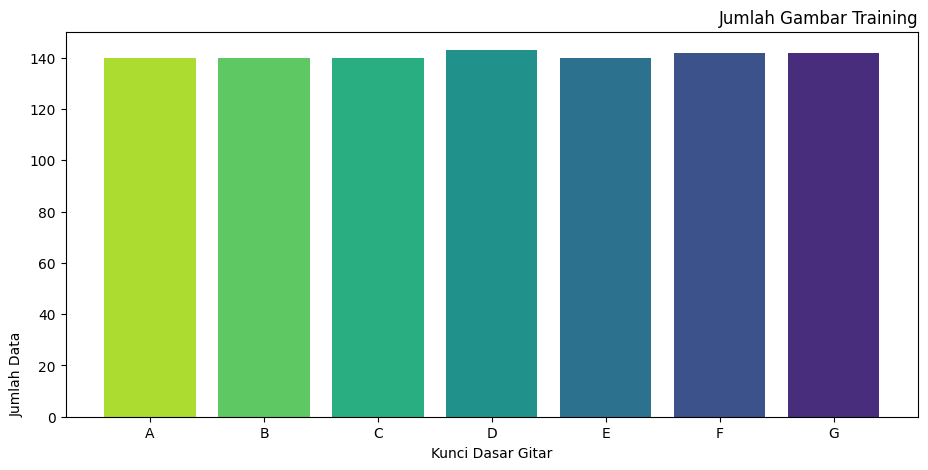

In [12]:
list_jumlah_file_train = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas in os.listdir(train_dir):
    list_file_kelas = os.listdir(os.path.join(train_dir, kelas)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file = len(list_file_kelas)
    list_jumlah_file_train.append(banyaknya_file) # masukkan jumlahnya ke dalam list

x = class_name # variabel yang berisi classname
y = list_jumlah_file_train ## list dari banyaknya jumlah file training yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette2)
plt.title('Jumlah Gambar Training', loc='right')
plt.xlabel('Kunci Dasar Gitar')
plt.ylabel('Jumlah Data', loc='bottom')
plt.show()

##### Jumlah Data Validation

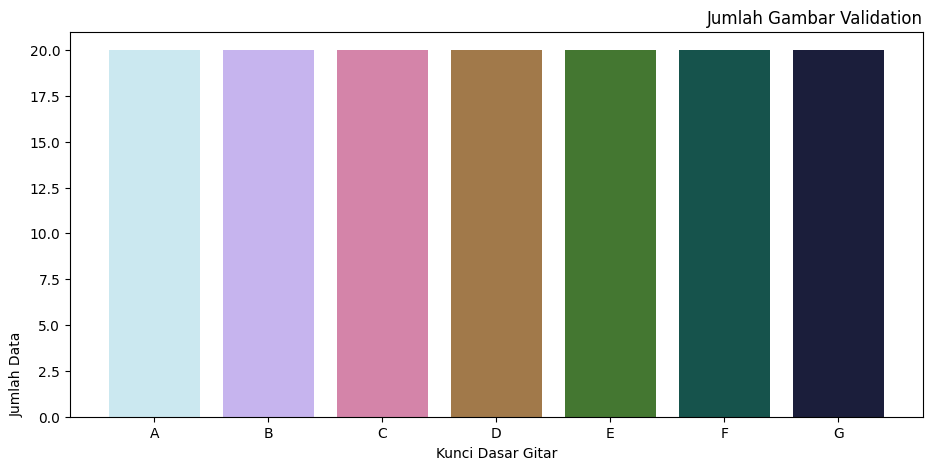

In [13]:
list_jumlah_file_val = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas1 in os.listdir(val_dir):
    list_file_kelas1 = os.listdir(os.path.join(val_dir, kelas1)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file1 = len(list_file_kelas1)
    list_jumlah_file_val.append(banyaknya_file1) # masukkan jumlahnya ke dalam list

x = class_name # variabel yang berisi classname
y = list_jumlah_file_val # list dari banyaknya jumlah file validation yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette3)
plt.title('Jumlah Gambar Validation', loc='right')
plt.xlabel('Kunci Dasar Gitar')
plt.ylabel('Jumlah Data', loc='bottom')
plt.show()

#### Jumlah Data Testing

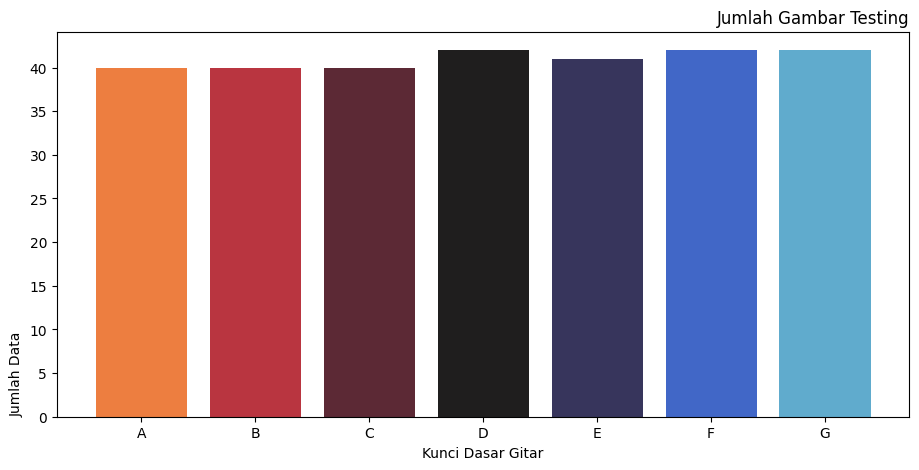

In [14]:
list_jumlah_file_test = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas1 in os.listdir(test_dir):
    list_file_kelas2 = os.listdir(os.path.join(test_dir, kelas1)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file2 = len(list_file_kelas2)
    list_jumlah_file_test.append(banyaknya_file2) # masukkan jumlahnya ke dalam list

x = class_name # variabel yang berisi classname
y = list_jumlah_file_test # list dari banyaknya jumlah file testing yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette4)
plt.title('Jumlah Gambar Testing', loc='right')
plt.xlabel('Kunci Dasar Gitar')
plt.ylabel('Jumlah Data', loc='bottom')
plt.show()

In [15]:
len(image)

32

In [16]:
label

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
 

#### Visualisasi Gambar Berdasarkan Nama Labelnya
- dari semua kelasdibuat sub plot 
- yang berbentuk matriks 3x3
- tidak menggunakan pengukuran(axis)

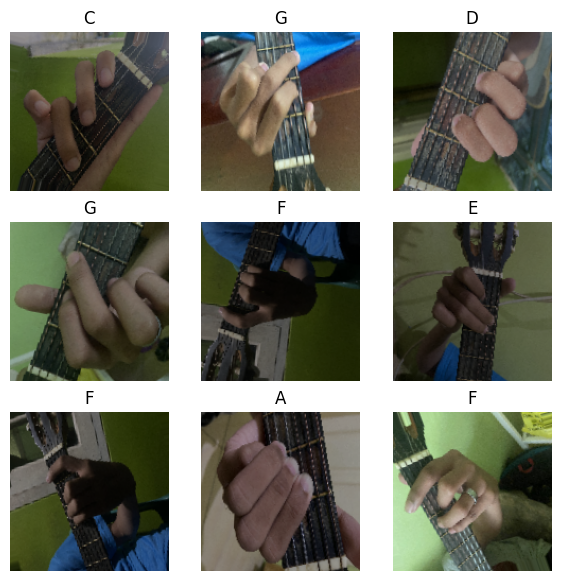

In [17]:
plt.figure(figsize=(7,7))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i])
  plt.title(class_name[np.argmax(label[i])])
  plt.axis("off")


#### Visualisasi Gambar dan Menampilkan ukuran dari tiap gambar(shape)

Ukuran gambar : (32, 150, 150, 3)


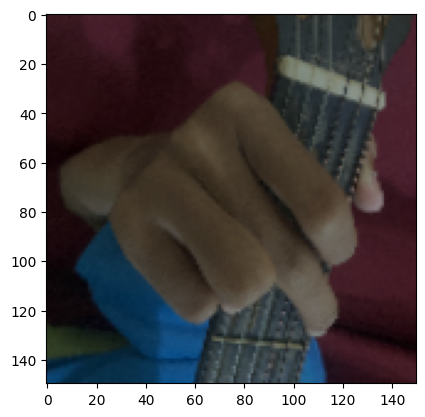

Ukuran gambar : (32, 150, 150, 3)


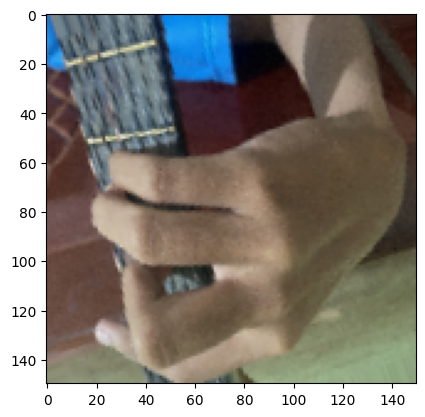

Ukuran gambar : (32, 150, 150, 3)


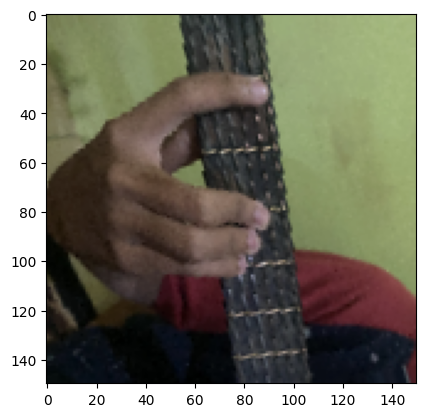

Ukuran gambar : (32, 150, 150, 3)


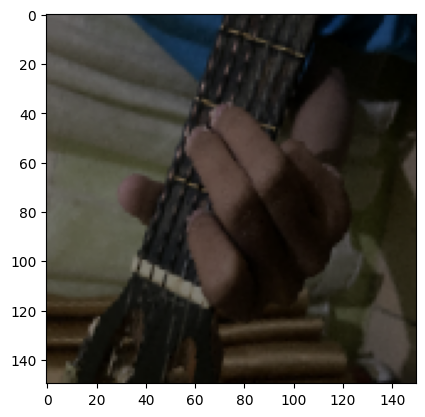

Ukuran gambar : (32, 150, 150, 3)


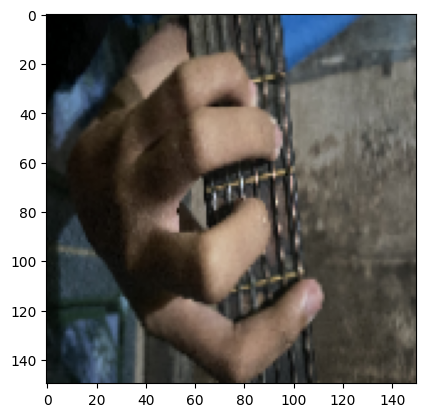

Ukuran gambar : (32, 150, 150, 3)


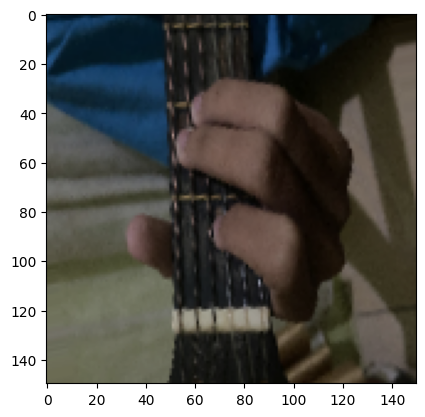

Ukuran gambar : (32, 150, 150, 3)


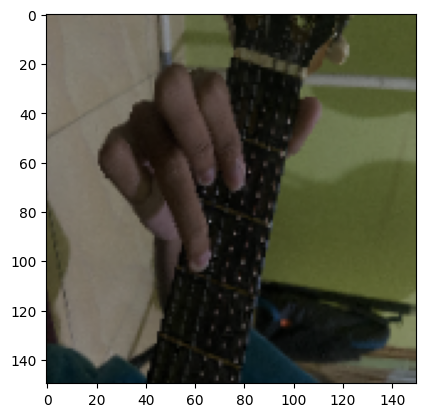

In [21]:
for _ in range(7):
  img, label = train_generator.next() # method mengembalikkan data
  print("Ukuran gambar :",img.shape)   #  (32,150,150,3)
  plt.imshow(img[i])
  plt.show()

# Modeling

In [22]:
from tensorflow import keras

#### Modelling dengan berberapa layer
- Pertama Input layer
    - Convolution filter sebanyak 32, input shape sesuai dengan gambar
    - fungsi aktivasi ReLU
- Kedua Hidden Layer
    - Pooling sebanyak 4 dengan matrix 2x2 
    - Convolution filter yang berbeda dari 64 sampai 128 dengan matrix 3x3 dengan Aktivasi ReLu
    - Layer Dropout 0.2 
    - Layer Flatten 
    - Layer Dense sebanyak 128 filter
- Ketiga Output layer
    - Layer dense sebanyak 7 filter dan fungsi aktivasi softmax

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)), #input layer
    # Hidden Layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), #menyatukan inputan yang memiliki dimensi
    tf.keras.layers.Dense(128, activation='relu'),
    # Hidden Layer
    tf.keras.layers.Dense(7, activation='softmax') # output Layer
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

#### untuk menampilkan visualisasi untuk plot model

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model,'model.png',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### compile model untuk mengatur konfigurasi model
- optimizer menggunakan metode Adam
- loss menggunakan metode Categorical Crossentropy
- kriteria berdasrkan akurasi

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', #untuk classifikasi lebih dari 2 class
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

## Training

#### Membuat fungsi callback ketika akurasi diatas 20 tidak bertambah akan iterasi(epoch) akan berhenti

In [27]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='accuracy', #dilihat berdasarkan validasi accuracy atau accuracy saja, tetapi monitor hanya bisa memasukkan 1 saja
                                patience=6)#jadi jika di 20 epoch selanjutnya itu tidak berubah maka diberentikan

#### proses ini yaitu melatih data dari model yang dibuat
- dengan iterasi sebanyak 30
- dan mengambil data validasi

In [28]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator, # untuk akurasi pengujian data
    callbacks=[monitor_val_acc]
)

Epoch 1/30
31/31 [==============================] - 100s 3s/step - loss: 1.9496 - accuracy: 0.1459 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.9404 - val_accuracy: 0.2857 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/30
31/31 [==============================] - 94s 3s/step - loss: 1.9217 - accuracy: 0.2188 - recall: 0.0010 - precision: 0.2000 - val_loss: 1.8556 - val_accuracy: 0.2429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/30
31/31 [==============================] - 96s 3s/step - loss: 1.7423 - accuracy: 0.3110 - recall: 0.0527 - precision: 0.6842 - val_loss: 1.5761 - val_accuracy: 0.3357 - val_recall: 0.1500 - val_precision: 0.6000
Epoch 4/30
31/31 [==============================] - 94s 3s/step - loss: 1.6272 - accuracy: 0.3536 - recall: 0.0912 - precision: 0.6207 - val_loss: 1.5130 - val_accuracy: 0.3857 - val_recall: 0.1929 - val_precision: 0.6923
Epoch 5/30
31/31 [==============================] - 114s 4s/step - loss: 1.4914 - accur

### Visualisasi Akurasi dan Loss

#### Visualisasi Akurasi Training dan Validation

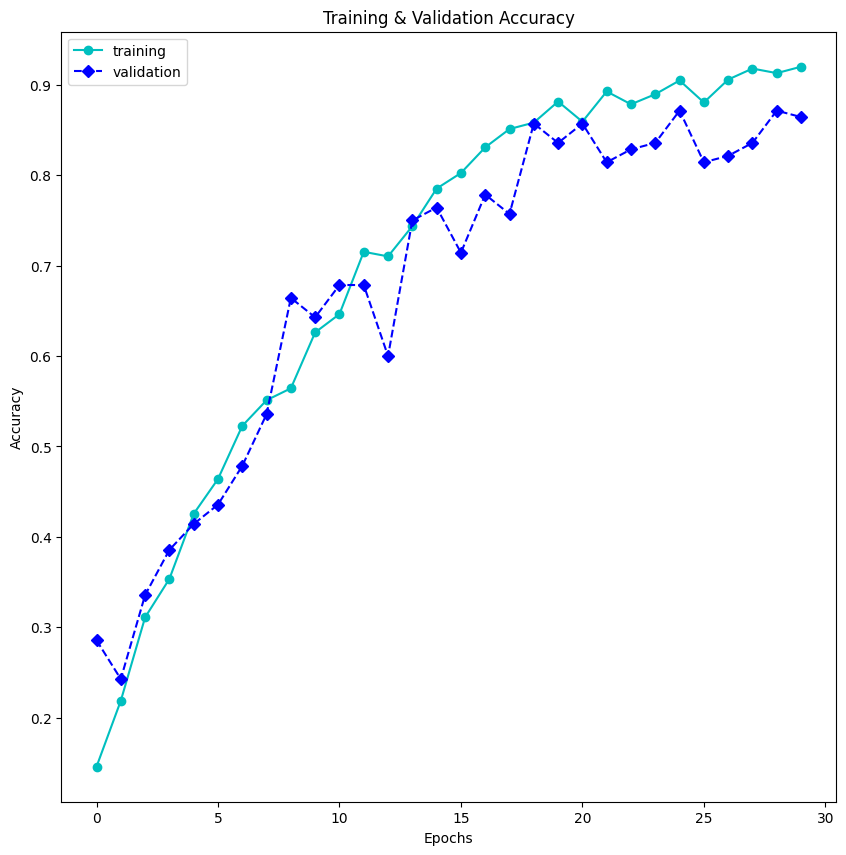

In [57]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['accuracy'])), 
         history.history['accuracy'],
         'co-',
         label='training')
plt.plot(range(len(history.history['val_accuracy'])), 
         history.history['val_accuracy'],
         'bD--',
         label='validation')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

#### Visualisasi Loss Training dan Validation

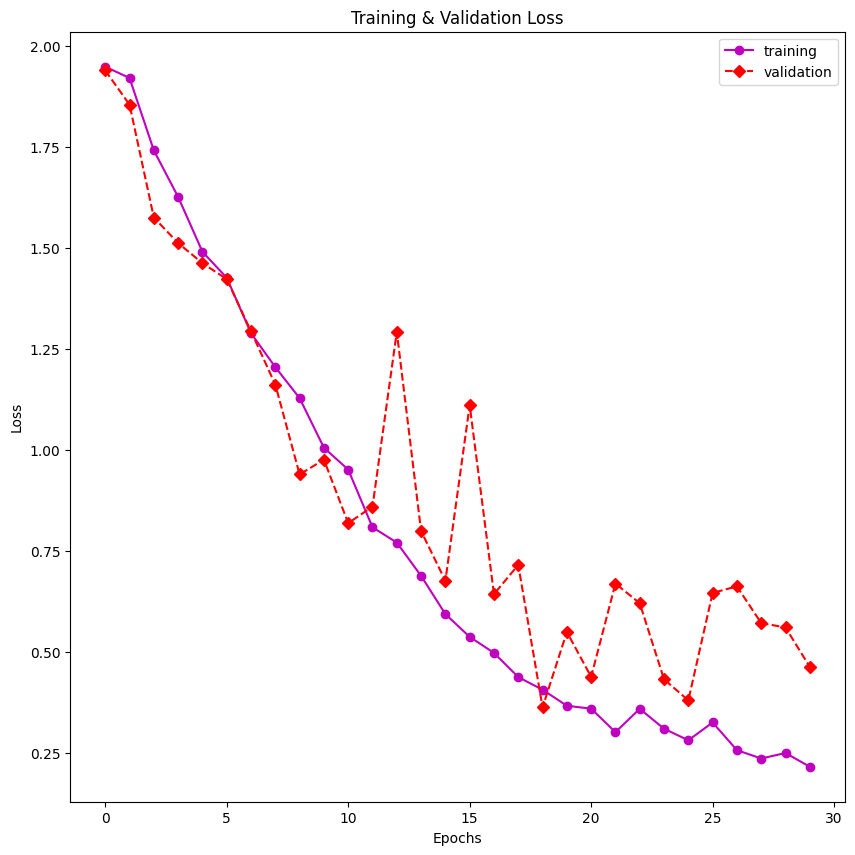

In [56]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['loss'])), 
         history.history['loss'],
         'mo-',
         label='training')
plt.plot(range(len(history.history['val_loss'])), 
         history.history['val_loss'],
         'rD--',
         label='validation')
plt.title('Training & Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#### Visualisasi Akurasi dan Loss, Pada Training dan Validation menggunakan sub plot

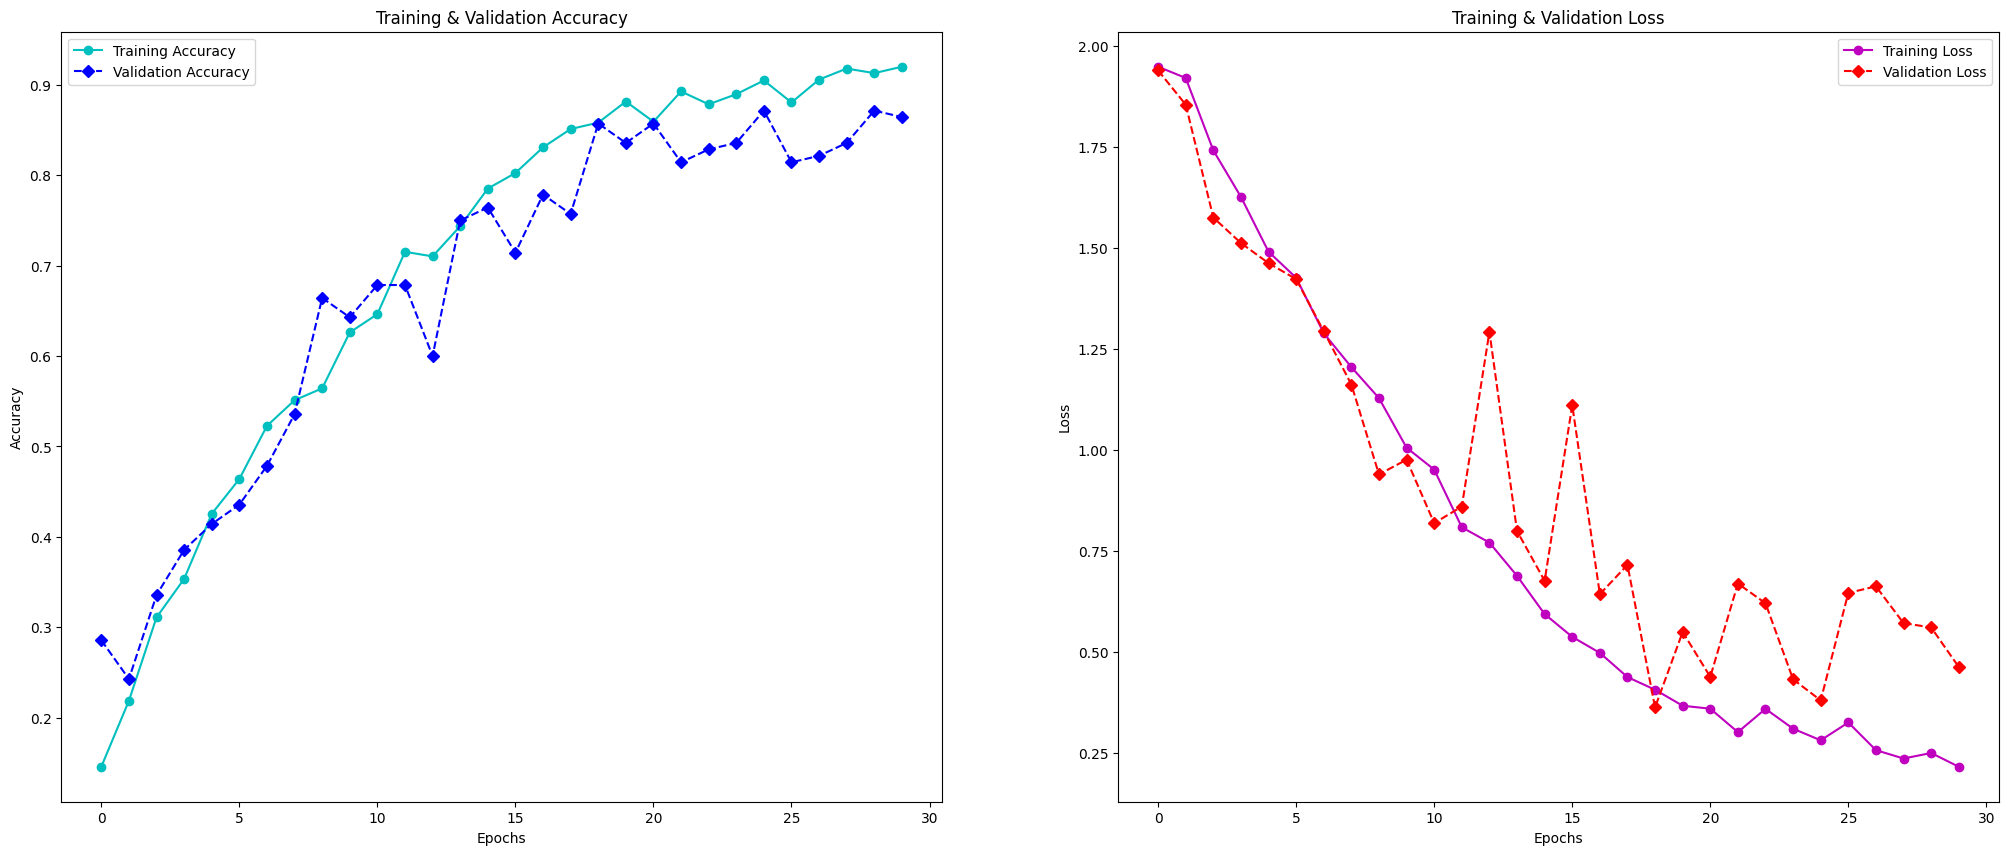

In [63]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(25,10)

ax[0].plot(epochs , train_acc , 'co-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'bD--' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'mo-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'rD--' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

### Visualisasi Hasil Recall, Precision

#### Visualisasi Recall pada Train dan Validation

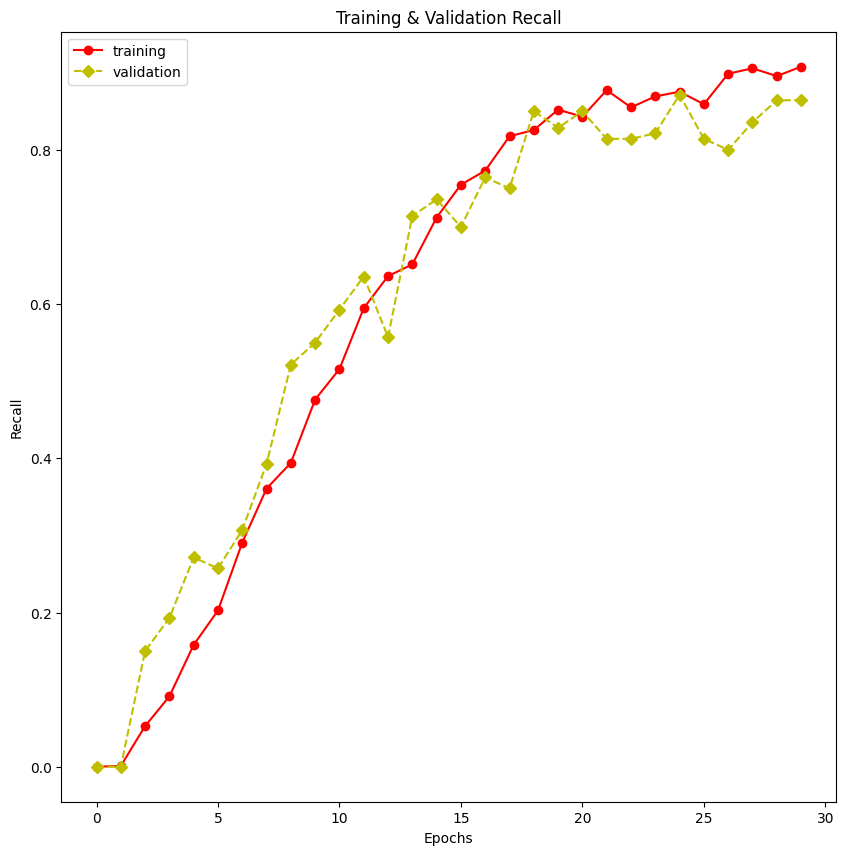

In [59]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['recall'])), 
         history.history['recall'],
         'ro-',
         label='training')
plt.plot(range(len(history.history['val_recall'])), 
         history.history['val_recall'],
         'yD--',
         label='validation')
plt.title('Training & Validation Recall')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.show()

#### Visualisasi Hasil Precision pada Train dan Validation

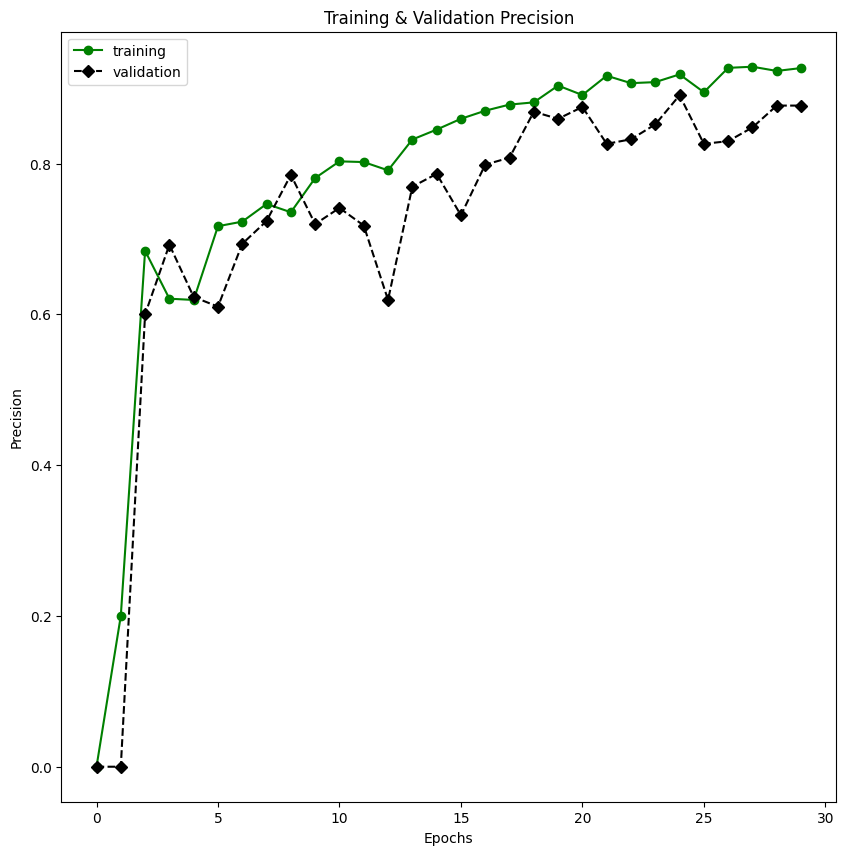

In [60]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['precision'])), 
         history.history['precision'],
         'go-',
         label='training')
plt.plot(range(len(history.history['val_precision'])), 
         history.history['val_precision'],
         'kD--',
         label='validation')
plt.title('Training & Validation Precision')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.show()

#### Visualisasi Recall dan Precision, Pada Training dan Validation menggunakan sub plot

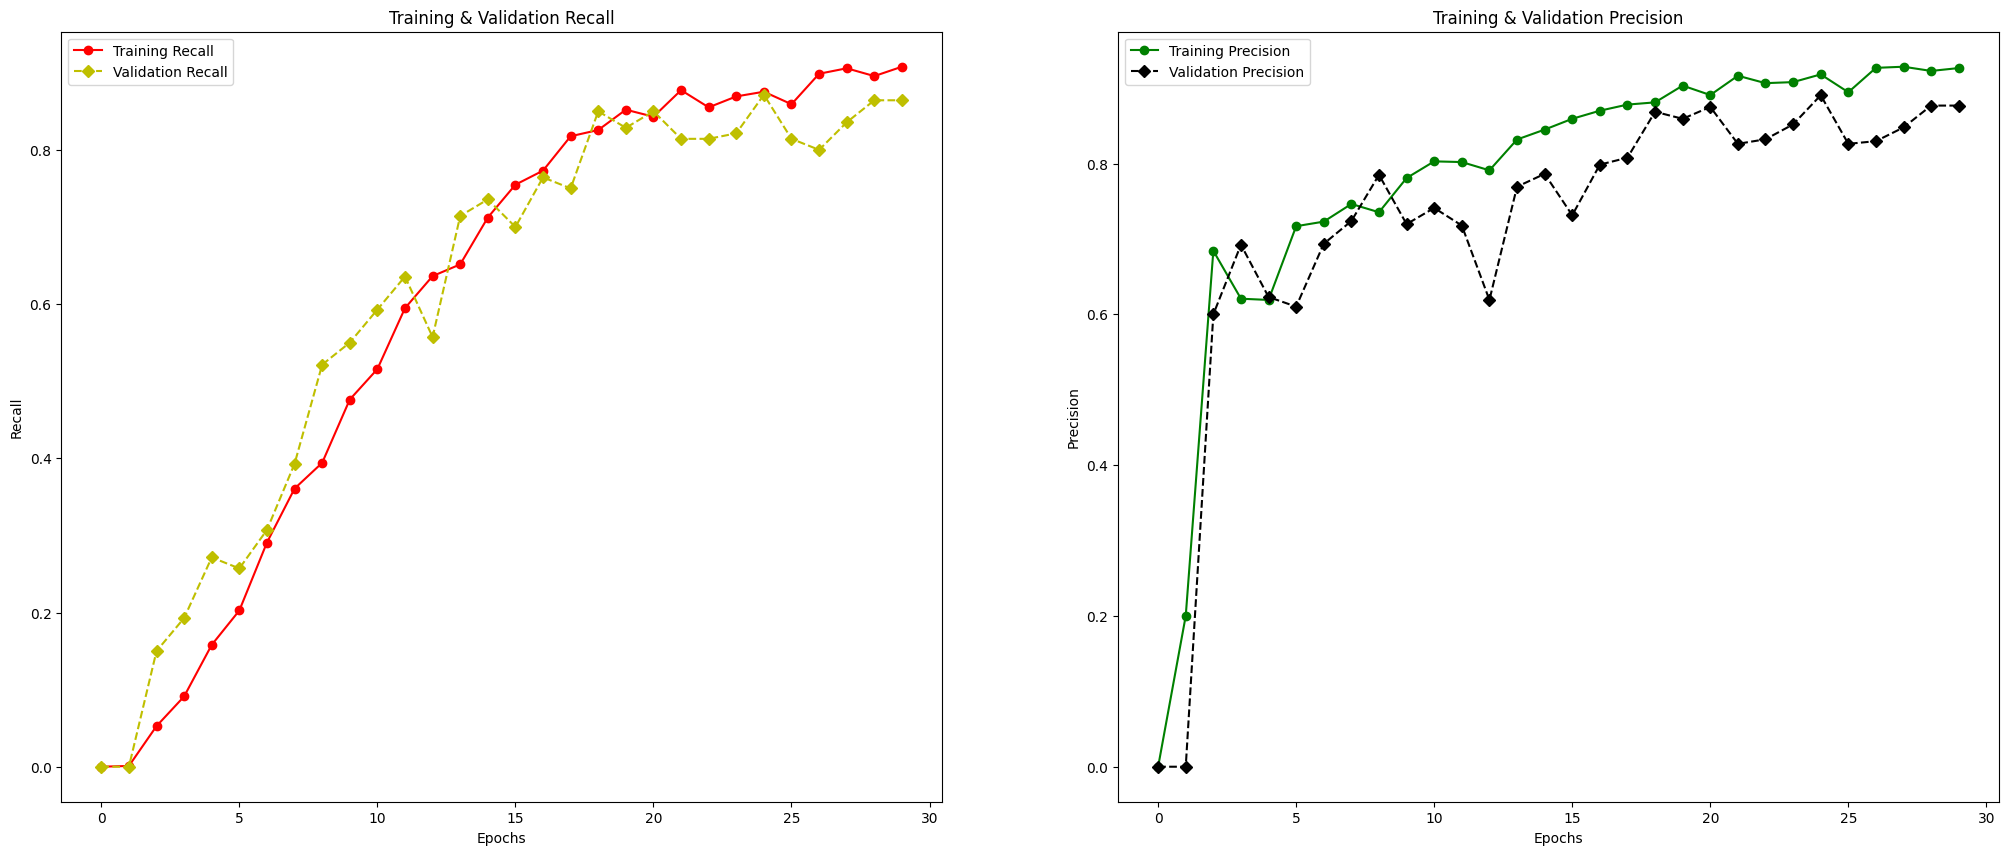

In [67]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_rec = history.history['recall']
train_pre = history.history['precision']
val_rec = history.history['val_recall']
val_pre = history.history['val_precision']
fig.set_size_inches(25,10)

ax[0].plot(epochs , train_rec , 'ro-' , label = 'Training Recall')
ax[0].plot(epochs , val_rec , 'yD--' , label = 'Validation Recall')
ax[0].set_title('Training & Validation Recall')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Recall")

ax[1].plot(epochs , train_pre , 'go-' , label = 'Training Precision')
ax[1].plot(epochs , val_pre , 'kD--' , label = 'Validation Precision')
ax[1].set_title('Training & Validation Precision')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Precision")
plt.show()

### Save Model diatas

In [68]:
model.save('C:\FILE SEB INSTALL ULANG 7 6 2021\KULIAH\Semester 5\Kecerdasan Buatan\Praktikum KB\Projek Akhir\Model Saved')
model.save('C:\FILE SEB INSTALL ULANG 7 6 2021\KULIAH\Semester 5\Kecerdasan Buatan\Praktikum KB\Projek Akhir\Model Saved')

INFO:tensorflow:Assets written to: C:\FILE SEB INSTALL ULANG 7 6 2021\KULIAH\Semester 5\Kecerdasan Buatan\Praktikum KB\Projek Akhir\Model Saved\assets


INFO:tensorflow:Assets written to: C:\FILE SEB INSTALL ULANG 7 6 2021\KULIAH\Semester 5\Kecerdasan Buatan\Praktikum KB\Projek Akhir\Model Saved\assets


INFO:tensorflow:Assets written to: C:\FILE SEB INSTALL ULANG 7 6 2021\KULIAH\Semester 5\Kecerdasan Buatan\Praktikum KB\Projek Akhir\Model Saved\assets


INFO:tensorflow:Assets written to: C:\FILE SEB INSTALL ULANG 7 6 2021\KULIAH\Semester 5\Kecerdasan Buatan\Praktikum KB\Projek Akhir\Model Saved\assets


# Evaluate

#### untuk menguji Hasil dari Training menggunakan Evaluate

In [33]:
test_evaluate = model.evaluate(test_generator, verbose=0)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}') #dibulatkan 2 artinya 2 angka di belakang koma

Test loss     : 0.48408418893814087
Test accuracy : 0.85


# Preview Hasil Prediksi

#### Visualisasi Hasil dari Prediksi yang benar

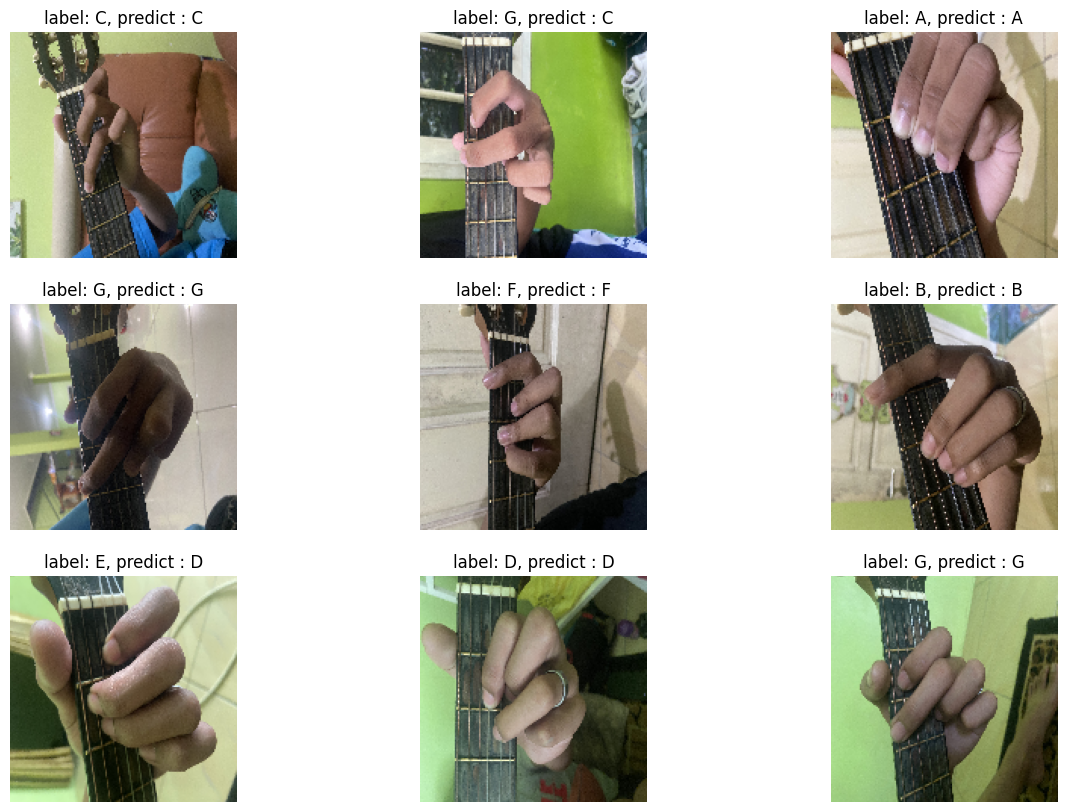

In [34]:
image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_name[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')

# Prediksi Error

#### Visualisasi Hasil dari Prediksi yang salah

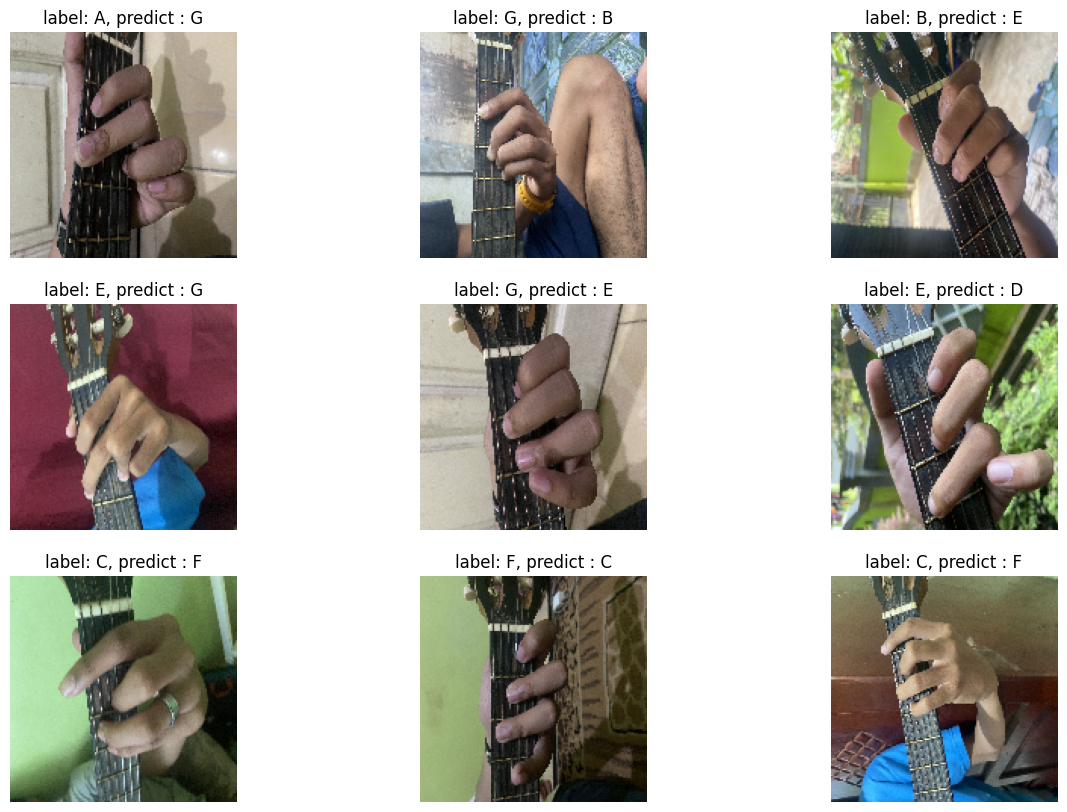

In [35]:
#Plot prediction Error
image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))

i,j = 0,0
while (j < 9):
    TrueLabel = class_name[np.argmax(label[j])]
    plt.subplot(3,3,j+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    if (TrueLabel != class_name[y_pred]):
        plt.imshow(tf.squeeze(image[i]))
        plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')
        j+=1
    i+=1

# Classification report dan Confusin Matrix

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
y_pred = model.predict(test_generator)

9/9 [==============================] - 22s 2s/step


In [38]:
y_pred

array([[2.3737741e-07, 9.2450506e-04, 7.7738333e-01, ..., 2.0277816e-01,
        3.8489848e-06, 9.6390415e-03],
       [1.1198028e-15, 5.3929489e-05, 9.9836963e-01, ..., 4.6711112e-04,
        2.7423541e-04, 7.7057944e-04],
       [1.0000000e+00, 2.6036384e-10, 7.5655081e-19, ..., 3.0762162e-09,
        8.6201906e-13, 3.0094866e-13],
       ...,
       [4.1774923e-21, 7.2642545e-11, 6.4167556e-09, ..., 1.8023090e-09,
        1.9787358e-09, 1.4613277e-14],
       [1.4517187e-08, 5.5523533e-03, 1.5297247e-04, ..., 1.8729428e-04,
        2.6144000e-04, 3.3959432e-10],
       [2.4152410e-20, 1.9880936e-14, 9.9994278e-01, ..., 4.9273829e-05,
        3.1028160e-09, 7.8729854e-06]], dtype=float32)

In [39]:
y_predict = np.argmax(y_pred, axis=1)

In [40]:
print(classification_report(test_generator.labels, y_predict, target_names = class_name))

              precision    recall  f1-score   support

           A       0.12      0.12      0.12        40
           B       0.09      0.07      0.08        40
           C       0.08      0.05      0.06        40
           D       0.23      0.33      0.27        42
           E       0.14      0.17      0.15        41
           F       0.19      0.17      0.18        42
           G       0.12      0.12      0.12        42

    accuracy                           0.15       287
   macro avg       0.14      0.15      0.14       287
weighted avg       0.14      0.15      0.14       287



# Confusion Matrix

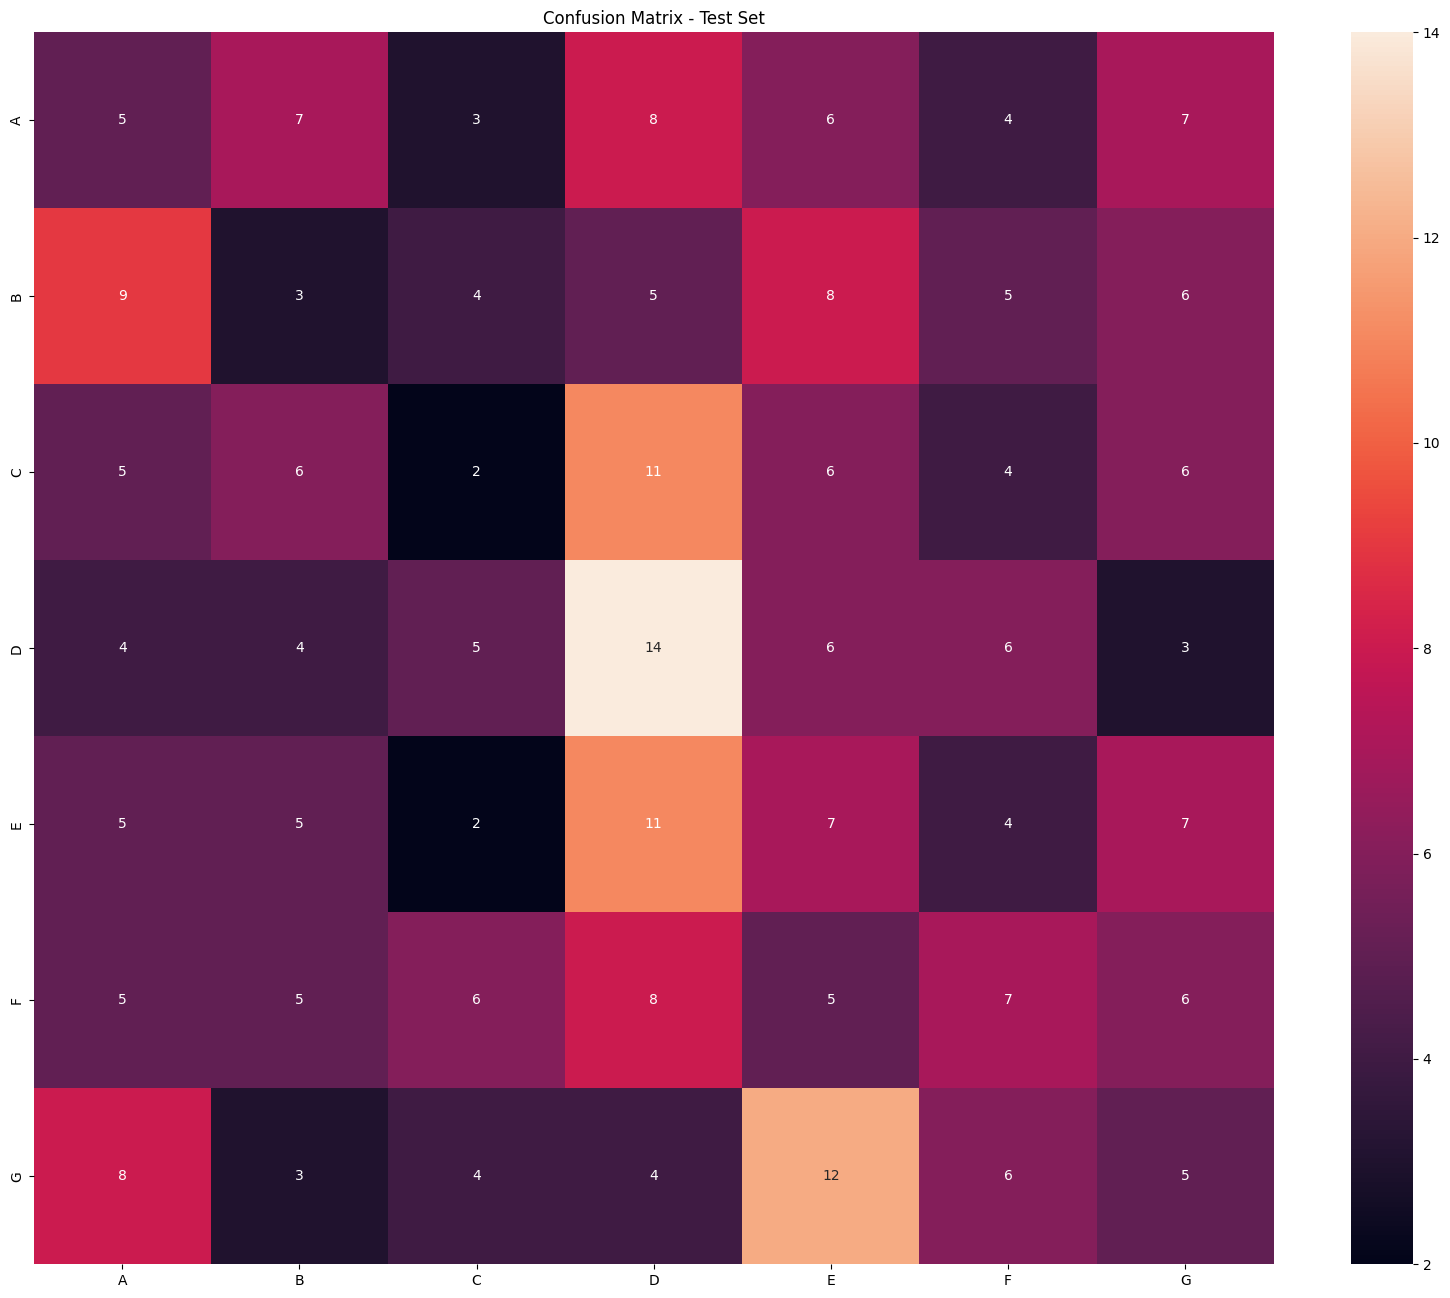

In [41]:
plt.figure(figsize=(20, 16))
cm = confusion_matrix(test_generator.labels, y_predict)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_name,yticklabels=class_name)
plt.title("Confusion Matrix - Test Set")
plt.show()

## Membuat Prediksi dengan Cara
- Mengupload Gambar
- dan melihat gambar itu termasuk dari kunci apa

In [ ]:
#  upload = files.upload() buat pas make google colab

In [42]:
# from google.colab import files
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np

1/1 [==============================] - 0s 36ms/step
C:/FILE SEB INSTALL ULANG 7 6 2021/KULIAH/Semester 5/Kecerdasan Buatan/Praktikum KB/Projek Akhir/GuitarChordsClassification/ready_dataset/test/F/IMG_1140.jpeg
F


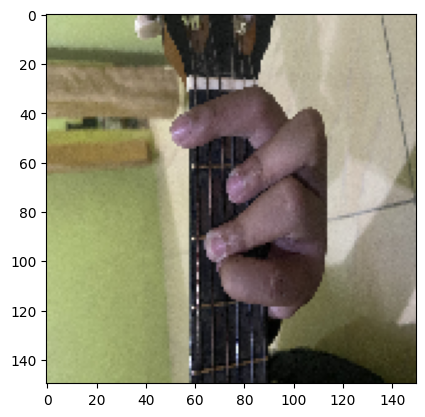

In [52]:
filename = askopenfilename()
img = tf.keras.utils.load_img(filename, target_size=(150, 150))
imgplot = plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)


image = np.vstack([x])
classes = model.predict(image, batch_size=32)

print(filename)
if classes[0][0] == 1:
  print('A')
elif classes[0][1] == 1:
  print('B')
elif classes[0][2] == 1:
  print('C')
elif classes[0][3] == 1:
  print('D')
elif classes[0][4] == 1:
  print('E')
elif classes[0][5] == 1:
  print('F')
else:
  print('G')